In [3]:
pip install pandas numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install numpy==1.26.4


   ---------------------------------------- 0.0/15.5 MB ? eta -:--:--
   ---------- ----------------------------- 3.9/15.5 MB 23.5 MB/s eta 0:00:01
   ------------------------- -------------- 9.7/15.5 MB 25.2 MB/s eta 0:00:01
   ------------------------------------- -- 14.7/15.5 MB 24.3 MB/s eta 0:00:01
   ---------------------------------------- 15.5/15.5 MB 21.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.2.6
    Uninstalling numpy-2.2.6:
      Successfully uninstalled numpy-2.2.6
Note: you may need to restart the kernel to use updated packages.


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
opencv-python 4.12.0.88 requires numpy<2.3.0,>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
streamlit 1.37.1 requires protobuf<6,>=3.20, but you have protobuf 6.32.0 which is incompatible.


In [1]:
import pandas as pd
import numpy as np
import random

np.random.seed(42)
random.seed(42)

num_samples = 1000

def url_length():
    return random.randint(10, 100)

def special_chars_count():
    return random.randint(0, 5)

def subdomain_count():
    return random.randint(0, 4)

def domain_age():
    return random.randint(0, 20)  # years

def popularity_rank():
    return random.randint(1, 1000000)

def ssl_valid():
    return random.choice([0, 1])  # 0 = invalid, 1 = valid

def nlp_suspicious_score():
    return np.round(np.random.normal(loc=0.5, scale=0.15), 2)

def image_similarity_score():
    return np.round(np.random.normal(loc=0.6, scale=0.2), 2)

def dns_query_pattern_score():
    return np.round(np.random.uniform(0, 1), 2)

def known_brand_mismatch():
    return random.choice([0, 1])  # 0=no mismatch, 1=mismatch

labels = random.choices(['genuine', 'suspicious'], weights=[0.7, 0.3], k=num_samples)

data = {
    'url_length': [url_length() for _ in range(num_samples)],
    'special_chars_count': [special_chars_count() for _ in range(num_samples)],
    'subdomain_count': [subdomain_count() for _ in range(num_samples)],
    'domain_age_years': [domain_age() for _ in range(num_samples)],
    'popularity_rank': [popularity_rank() for _ in range(num_samples)],
    'ssl_valid': [ssl_valid() for _ in range(num_samples)],
    'nlp_suspicious_score': [nlp_suspicious_score() for _ in range(num_samples)],
    'image_similarity_score': [image_similarity_score() for _ in range(num_samples)],
    'dns_query_pattern_score': [dns_query_pattern_score() for _ in range(num_samples)],
    'known_brand_mismatch': [known_brand_mismatch() for _ in range(num_samples)],
    'label': labels
}

df = pd.DataFrame(data)
df['nlp_suspicious_score'] = df['nlp_suspicious_score'].clip(0, 1)
df['image_similarity_score'] = df['image_similarity_score'].clip(0, 1)

df.to_csv('fraud_detection_dataset.csv', index=False)
print("Dataset saved as fraud_detection_dataset.csv")


Dataset saved as fraud_detection_dataset.csv


In [9]:
import pandas as pd
df = pd.read_csv('fraud_detection_dataset.csv')
print(df.head())


   url_length  special_chars_count  subdomain_count  domain_age_years  \
0          22                    0                1                 6   
1          97                    3                4                14   
2          57                    2                3                 6   
3          79                    2                2                13   
4          92                    4                3                15   

   popularity_rank  ssl_valid  nlp_suspicious_score  image_similarity_score  \
0           924880          0                  0.57                    0.88   
1           145719          0                  0.48                    0.78   
2           461268          0                  0.60                    0.61   
3           173651          1                  0.73                    0.47   
4           241163          0                  0.46                    0.74   

   dns_query_pattern_score  known_brand_mismatch       label  
0                     0

In [10]:
print(df.info())
print(df.describe())
print(df['label'].value_counts())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   url_length               1000 non-null   int64  
 1   special_chars_count      1000 non-null   int64  
 2   subdomain_count          1000 non-null   int64  
 3   domain_age_years         1000 non-null   int64  
 4   popularity_rank          1000 non-null   int64  
 5   ssl_valid                1000 non-null   int64  
 6   nlp_suspicious_score     1000 non-null   float64
 7   image_similarity_score   1000 non-null   float64
 8   dns_query_pattern_score  1000 non-null   float64
 9   known_brand_mismatch     1000 non-null   int64  
 10  label                    1000 non-null   object 
dtypes: float64(3), int64(7), object(1)
memory usage: 86.1+ KB
None
        url_length  special_chars_count  subdomain_count  domain_age_years  \
count  1000.000000          1000.000000      1

In [11]:
print(df.isnull().sum())


url_length                 0
special_chars_count        0
subdomain_count            0
domain_age_years           0
popularity_rank            0
ssl_valid                  0
nlp_suspicious_score       0
image_similarity_score     0
dns_query_pattern_score    0
known_brand_mismatch       0
label                      0
dtype: int64


In [13]:
df['label_num'] = df['label'].map({'genuine': 0, 'suspicious': 1})


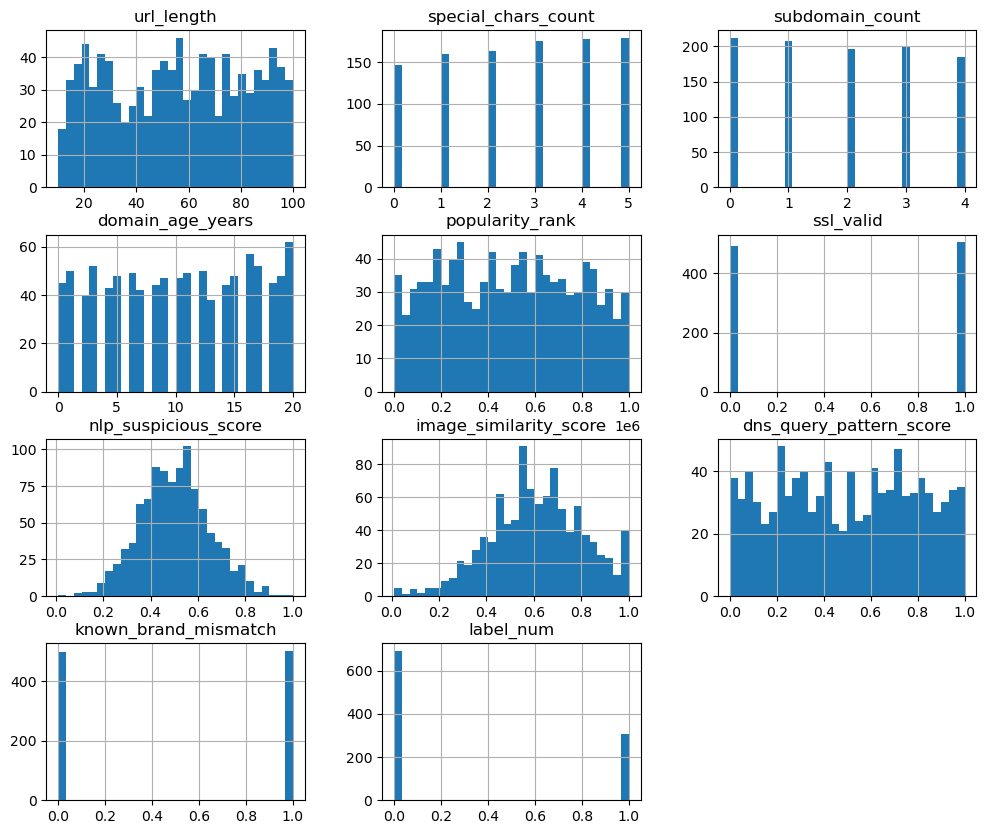

In [14]:
import matplotlib.pyplot as plt
df.hist(bins=30, figsize=(12,10))
plt.show()


In [17]:
from sklearn.model_selection import train_test_split
X = df.drop(['label', 'label_num'], axis=1)
y = df['label_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))




              precision    recall  f1-score   support

           0       0.64      0.98      0.77       125
           1       0.71      0.07      0.12        75

    accuracy                           0.64       200
   macro avg       0.68      0.53      0.45       200
weighted avg       0.67      0.64      0.53       200



In [18]:
clf = RandomForestClassifier(class_weight='balanced')


In [20]:
# Fit the model first
clf.fit(X_train, y_train)

# Now get feature importances
importances = clf.feature_importances_
print(importances)



[0.14976084 0.06512113 0.05914991 0.10505306 0.1627669  0.02323184
 0.13322473 0.14174705 0.13851296 0.02143158]


In [21]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(scores)


[0.685 0.705 0.68  0.68  0.665]


In [22]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20]
}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X, y)
print(grid.best_params_)


{'max_depth': 10, 'n_estimators': 200}


In [23]:
from sklearn.metrics import confusion_matrix, roc_curve, auc
# Confusion matrix
print(confusion_matrix(y_test, predictions))
# ROC curve
# ... code for ROC ...


[[123   2]
 [ 70   5]]


Classification report with default threshold (0.5):
              precision    recall  f1-score   support

           0       0.70      0.67      0.69       138
           1       0.33      0.35      0.34        62

    accuracy                           0.57       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.58      0.57      0.58       200

Classification report with adjusted threshold (0.3):
              precision    recall  f1-score   support

           0       0.94      0.12      0.22       138
           1       0.34      0.98      0.50        62

    accuracy                           0.39       200
   macro avg       0.64      0.55      0.36       200
weighted avg       0.76      0.39      0.31       200

ROC AUC Score: 0.5614


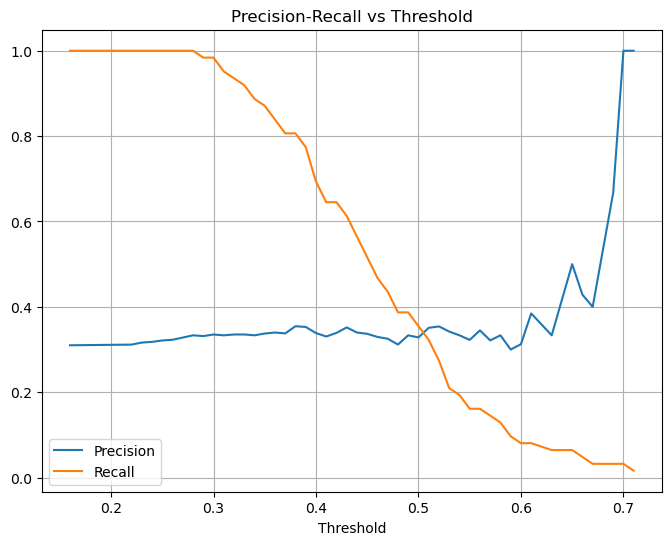

Feature importances:
                   Feature  Importance
4          popularity_rank    0.155465
8  dns_query_pattern_score    0.152453
0               url_length    0.143893
7   image_similarity_score    0.143038
6     nlp_suspicious_score    0.137510
3         domain_age_years    0.106591
1      special_chars_count    0.063597
2          subdomain_count    0.053388
5                ssl_valid    0.022898
9     known_brand_mismatch    0.021166


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import numpy as np

# Load data
df = pd.read_csv('fraud_detection_dataset.csv')

# Map labels to numeric
df['label_num'] = df['label'].map({'genuine': 0, 'suspicious': 1})

# Prepare data
X = df.drop(['label', 'label_num'], axis=1)
y = df['label_num']

# Split data (train-test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Define SMOTE oversampler and undersampler pipeline (balancing classes)
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Increase minority to 50% of majority
under = RandomUnderSampler(sampling_strategy=0.8, random_state=42)  # Reduce majority to 80% of minority after oversampling
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# Apply pipeline to training data only
X_train_balanced, y_train_balanced = pipeline.fit_resample(X_train, y_train)

# Define classifier with class weight balanced
clf = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train model on balanced data
clf.fit(X_train_balanced, y_train_balanced)

# Predict probabilities to tune threshold
y_probs = clf.predict_proba(X_test)[:, 1]

# Default threshold 0.5 classification
y_pred_default = (y_probs >= 0.5).astype(int)

print("Classification report with default threshold (0.5):")
print(classification_report(y_test, y_pred_default))

# Adjust threshold to increase recall (e.g., threshold = 0.3)
threshold = 0.3
y_pred_adjusted = (y_probs >= threshold).astype(int)

print(f"Classification report with adjusted threshold ({threshold}):")
print(classification_report(y_test, y_pred_adjusted))

# ROC AUC score
roc_auc = roc_auc_score(y_test, y_probs)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plot Precision-Recall Curve for threshold tuning visualization
precision, recall, thresholds = precision_recall_curve(y_test, y_probs)

plt.figure(figsize=(8, 6))
plt.plot(thresholds, precision[:-1], label='Precision')
plt.plot(thresholds, recall[:-1], label='Recall')
plt.xlabel('Threshold')
plt.title('Precision-Recall vs Threshold')
plt.legend()
plt.grid(True)
plt.show()

# Feature importance
importances = clf.feature_importances_
feature_names = X.columns
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

print("Feature importances:")
print(feat_imp_df)


In [25]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [5, 10]}
grid = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid.fit(X_train_balanced, y_train_balanced)
print(grid.best_params_)


{'max_depth': 10, 'n_estimators': 200}


In [3]:
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Dataset generation
np.random.seed(42)
random.seed(42)
num_samples = 1000
def url_length():
    return random.randint(10, 100)
def special_chars_count():
    return random.randint(0, 5)
def subdomain_count():
    return random.randint(0, 4)
def domain_age():
    return random.randint(0, 20)
def popularity_rank():
    return random.randint(1, 1000000)
def ssl_valid():
    return random.choice([0, 1])
def nlp_suspicious_score():
    return np.round(np.random.normal(loc=0.5, scale=0.15), 2)
def image_similarity_score():
    return np.round(np.random.normal(loc=0.6, scale=0.2), 2)
def dns_query_pattern_score():
    return np.round(np.random.uniform(0, 1), 2)
def known_brand_mismatch():
    return random.choice([0, 1])
labels = random.choices(['genuine', 'suspicious'], weights=[0.7, 0.3], k=num_samples)
data = {
    'url_length': [url_length() for _ in range(num_samples)],
    'special_chars_count': [special_chars_count() for _ in range(num_samples)],
    'subdomain_count': [subdomain_count() for _ in range(num_samples)],
    'domain_age_years': [domain_age() for _ in range(num_samples)],
    'popularity_rank': [popularity_rank() for _ in range(num_samples)],
    'ssl_valid': [ssl_valid() for _ in range(num_samples)],
    'nlp_suspicious_score': [nlp_suspicious_score() for _ in range(num_samples)],
    'image_similarity_score': [image_similarity_score() for _ in range(num_samples)],
    'dns_query_pattern_score': [dns_query_pattern_score() for _ in range(num_samples)],
    'known_brand_mismatch': [known_brand_mismatch() for _ in range(num_samples)],
    'label': labels
}
df = pd.DataFrame(data)
df['nlp_suspicious_score'] = df['nlp_suspicious_score'].clip(0, 1)
df['image_similarity_score'] = df['image_similarity_score'].clip(0, 1)

# Preprocessing
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])
X = df.drop('label', axis=1)
y = df['label']
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

# Model training
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(report)



Accuracy: 0.6650
Precision: 0.1429
Recall: 0.0161
F1-score: 0.0290
Confusion Matrix:
[[132   6]
 [ 61   1]]
Classification Report:
              precision    recall  f1-score   support

     genuine       0.68      0.96      0.80       138
  suspicious       0.14      0.02      0.03        62

    accuracy                           0.67       200
   macro avg       0.41      0.49      0.41       200
weighted avg       0.52      0.67      0.56       200



In [4]:
pip install shap


   ---------------------------------------- 0.0/545.3 kB ? eta -:--:--
   ---------------------------------------- 545.3/545.3 kB 6.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset
df = pd.read_csv('fraud_detection_dataset.csv')

# Encode the 'label' column (genuine=0, suspicious=1)
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

In [11]:
# Install imbalanced-learn if not installed
# !pip install imblearn

from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Initialize and train the Random Forest again on balanced data
model_balanced = RandomForestClassifier(random_state=42)
model_balanced.fit(X_train_balanced, y_train_balanced)

# Predict on the original test set
y_pred_balanced = model_balanced.predict(X_test)

# Evaluate performance after balancing
print(f"Accuracy: {accuracy_score(y_test, y_pred_balanced):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_balanced):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_balanced):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_balanced):.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_balanced))

print("Classification Report:")
print(classification_report(y_test, y_pred_balanced, target_names=['genuine', 'suspicious']))






Accuracy: 0.6700
Precision: 0.4375
Recall: 0.2258
F1-score: 0.2979
Confusion Matrix:
[[120  18]
 [ 48  14]]
Classification Report:
              precision    recall  f1-score   support

     genuine       0.71      0.87      0.78       138
  suspicious       0.44      0.23      0.30        62

    accuracy                           0.67       200
   macro avg       0.58      0.55      0.54       200
weighted avg       0.63      0.67      0.63       200



In [12]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

print(f"Best parameters: {grid_search.best_params_}")
best_model = grid_search.best_estimator_


Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


In [13]:
y_pred_best = best_model.predict(X_test)

print(f"Accuracy: {accuracy_score(y_test, y_pred_best):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_best):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_best):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_best):.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_best))

print("Classification Report:")
print(classification_report(y_test, y_pred_best, target_names=['genuine', 'suspicious']))


Accuracy: 0.6600
Precision: 0.3929
Recall: 0.1774
F1-score: 0.2444
Confusion Matrix:
[[121  17]
 [ 51  11]]
Classification Report:
              precision    recall  f1-score   support

     genuine       0.70      0.88      0.78       138
  suspicious       0.39      0.18      0.24        62

    accuracy                           0.66       200
   macro avg       0.55      0.53      0.51       200
weighted avg       0.61      0.66      0.61       200



In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Load your dataset
df = pd.read_csv('fraud_detection_dataset.csv')

# Encode the 'label' column
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['label'])

# Separate features and labels
X = df.drop('label', axis=1)
y = df['label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42, stratify=y)
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)



In [6]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Initialize individual models
rf = RandomForestClassifier(random_state=42)
xgb_clf = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
lr = LogisticRegression(max_iter=1000, random_state=42)

# Create Voting Classifier (soft voting)
voting_clf = VotingClassifier(
    estimators=[('rf', rf), ('xgb', xgb_clf), ('lr', lr)],
    voting='soft',
    n_jobs=-1
)

# Train ensemble on balanced data
voting_clf.fit(X_train_balanced, y_train_balanced)

# Predict on test data
y_pred_ensemble = voting_clf.predict(X_test)

# Evaluate ensemble performance
print(f"Accuracy: {accuracy_score(y_test, y_pred_ensemble):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_ensemble):.4f}")
print(f"Recall: {recall_score(y_test, y_pred_ensemble):.4f}")
print(f"F1-score: {f1_score(y_test, y_pred_ensemble):.4f}")

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_ensemble))

print("Classification Report:")
print(classification_report(y_test, y_pred_ensemble, target_names=['genuine', 'suspicious']))



Accuracy: 0.6400
Precision: 0.3684
Recall: 0.2258
F1-score: 0.2800
Confusion Matrix:
[[114  24]
 [ 48  14]]
Classification Report:
              precision    recall  f1-score   support

     genuine       0.70      0.83      0.76       138
  suspicious       0.37      0.23      0.28        62

    accuracy                           0.64       200
   macro avg       0.54      0.53      0.52       200
weighted avg       0.60      0.64      0.61       200



In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

# Build model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # Binary classification
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Early stopping to avoid overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train model
history = model.fit(X_train, y_train, epochs=100, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop])

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict and generate classification report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


C:\Users\mhris\New folder\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 33ms/step - accuracy: 0.4141 - loss: 0.7625 - val_accuracy: 0.6500 - val_loss: 0.6511
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6313 - loss: 0.6566 - val_accuracy: 0.6750 - val_loss: 0.6247
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6766 - loss: 0.6430 - val_accuracy: 0.6750 - val_loss: 0.6213
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6859 - loss: 0.6207 - val_accuracy: 0.6750 - val_loss: 0.6215
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6750 - loss: 0.6298 - val_accuracy: 0.6750 - val_loss: 0.6210
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6828 - loss: 0.6183 - val_accuracy: 0.6750 - val_loss: 0.6215
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6969 - loss: 0.6208 - val_accuracy: 0.6750 - val_loss: 0.6208
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6922 - loss: 0.6091 - val_accuracy: 0.

C:\Users\mhris\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mhris\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mhris\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Epoch 1/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6922 - loss: 0.6099 - val_accuracy: 0.6750 - val_loss: 0.6204
Epoch 2/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7016 - loss: 0.6068 - val_accuracy: 0.6750 - val_loss: 0.6199
Epoch 3/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7016 - loss: 0.5997 - val_accuracy: 0.6750 - val_loss: 0.6203
Epoch 4/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6938 - loss: 0.6069 - val_accuracy: 0.6750 - val_loss: 0.6210
Epoch 5/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6969 - loss: 0.6012 - val_accuracy: 0.6750 - val_loss: 0.6206
Epoch 6/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7016 - loss: 0.5967 - val_accuracy: 0.6750 - val_loss: 0.6211
Epoch 7/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.6984 - loss: 0.6068 - val_accuracy: 0.6750 - val_loss: 0.6211
Epoch 8/200
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7047 - loss: 0.5961 - val_accuracy: 0.

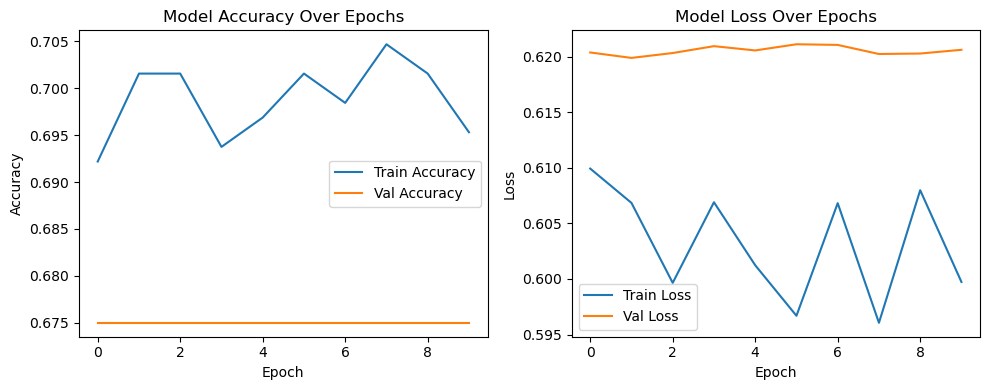

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.6900 - loss: 0.6097
Test Accuracy: 0.6900
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.69      1.00      0.82       138
           1       0.00      0.00      0.00        62

    accuracy                           0.69       200
   macro avg       0.34      0.50      0.41       200
weighted avg       0.48      0.69      0.56       200

Confusion Matrix:
[[138   0]
 [ 62   0]]


C:\Users\mhris\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mhris\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\mhris\New folder\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
import matplotlib.pyplot as plt

# Increase epochs to, say, 200
epochs = 200

# Train model with early stopping
history = model.fit(X_train, y_train, epochs=epochs, batch_size=32,
                    validation_split=0.2, callbacks=[early_stop])

# Plot training & validation accuracy values
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

# Evaluate on test data (unchanged)
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict and classification report (unchanged)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


In [9]:
from sklearn.utils import class_weight
import numpy as np

# Compute class weights from training labels
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))

# Train model with class weights
history = model.fit(
    X_train, y_train,
    epochs=100,
    batch_size=32,
    validation_split=0.2,
    class_weight=class_weights_dict,
    callbacks=[early_stop]
)

# Evaluate on test data
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

# Predict and classification report
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Epoch 1/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - accuracy: 0.7000 - loss: 0.7144 - val_accuracy: 0.6750 - val_loss: 0.6265
Epoch 2/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6719 - loss: 0.6830 - val_accuracy: 0.6313 - val_loss: 0.6539
Epoch 3/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6000 - loss: 0.6839 - val_accuracy: 0.6187 - val_loss: 0.6680
Epoch 4/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5891 - loss: 0.6689 - val_accuracy: 0.5938 - val_loss: 0.6762
Epoch 5/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.5672 - loss: 0.6716 - val_accuracy: 0.6125 - val_loss: 0.6751
Epoch 6/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.5453 - loss: 0.6707 - val_accuracy: 0.5625 - val_loss: 0.6792
Epoch 7/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.5828 - loss: 0.6669 - val_accuracy: 0.6000 - val_loss: 0.6737
Epoch 8/100
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5797 - loss: 0.6576 - val_accuracy: 0.

In [10]:
import numpy as np
from sklearn.metrics import precision_recall_curve, f1_score

# Predict probabilities on test set
y_scores = model.predict(X_test).ravel()

# Calculate precision-recall pairs for different thresholds
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Find threshold that maximizes F1 score
f1_scores = 2 * (precision * recall) / (precision + recall + 1e-8)
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]

print(f"Best Threshold: {best_threshold:.4f} with F1-score: {f1_scores[best_index]:.4f}")

# Predict with new threshold
y_pred_opt = (y_scores >= best_threshold).astype(int)

print("Classification Report with optimized threshold:")
print(classification_report(y_test, y_pred_opt))

print("Confusion Matrix with optimized threshold:")
print(confusion_matrix(y_test, y_pred_opt))


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step 
Best Threshold: 0.3437 with F1-score: 0.5100
Classification Report with optimized threshold:
              precision    recall  f1-score   support

           0       0.82      0.37      0.51       138
           1       0.37      0.82      0.51        62

    accuracy                           0.51       200
   macro avg       0.60      0.60      0.51       200
weighted avg       0.68      0.51      0.51       200

Confusion Matrix with optimized threshold:
[[51 87]
 [11 51]]


In [13]:
print("test_subset shape:", test_subset.shape)
print("shap_values[0] shape:", shap_values[0].shape)
print("feature_names:", len(df.drop('label', axis=1).columns))


test_subset shape: (100, 10)
shap_values[0] shape: (10, 1)
feature_names: 10


In [14]:
test_subset = X_test[:100]  # should not have label column
feature_names = df.drop('label', axis=1).columns.tolist()
print(test_subset.shape, len(feature_names))


(100, 10) 10


In [16]:
 Dense(1, activation='sigmoid')


<Dense name=dense_3, built=False>

In [17]:
shap_values = explainer.shap_values(test_subset)
print(np.array(shap_values).shape)  # Should be (100, 1) or (100, 10) if using features


(100, 10, 1)


C:\Users\mhris\New folder\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 10))']
  warnings.warn(msg)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,453 (33.02 KB)

 Trainable params: 2,817 (11.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,636 (22.02 KB)

In [22]:
shap_values = explainer.shap_values(test_subset)
print(np.array(shap_values).shape)


(100, 10, 1)


C:\Users\mhris\New folder\Lib\site-packages\keras\src\models\functional.py:241: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor
Received: inputs=['Tensor(shape=(100, 10))']
  warnings.warn(msg)


In [23]:
shap_values = np.array(shap_values)
shap_values = shap_values.squeeze()
print(shap_values.shape)
# If still not right, try shap_values.T


(100, 10)


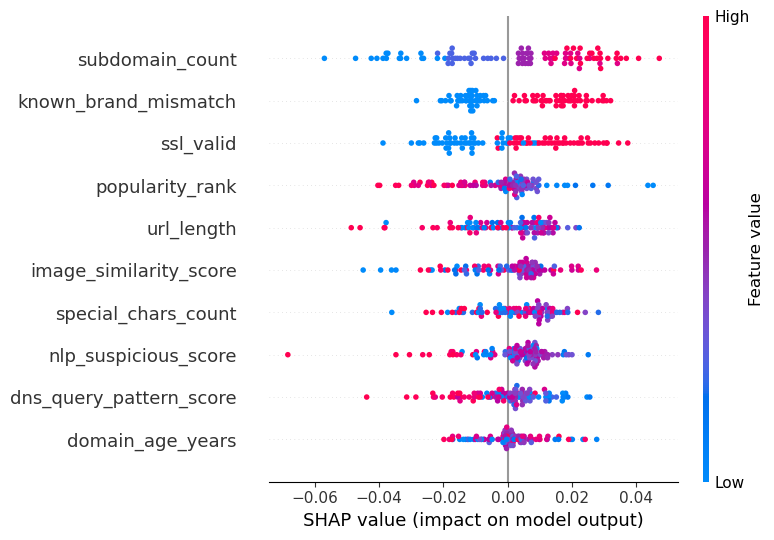

In [24]:
shap.summary_plot(shap_values, test_subset, feature_names=feature_names)
